# Discrete Population Compartmental Model

Treats the population as discrete rather than continuous.

In [1]:
# Import those libraries
import math
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import os
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from numpy import genfromtxt
import matplotlib.image as mpimg
import pandas as pd
import scipy
import time
from operator import add
from scipy.stats import binom
from numpy import random
from joblib import Parallel, delayed
import collections
import csv
from scipy.optimize import curve_fit

In [2]:
## Import up sound alert dependencies
from IPython.display import Audio, display

def allDone():
    display(Audio(url='https://sound.peal.io/ps/audios/000/000/537/original/woo_vu_luvub_dub_dub.wav', autoplay=True))
## Insert whatever audio file you want above

In [23]:
waloc = pd.read_csv('/Users/Yuval/Desktop/Thesis/all-wa-pos_withregions.csv')#use this for all 297 towns
waloc = waloc.loc[waloc['Population'] >0]
# When doing big towns
waloc = waloc[:58]

# When ignoring sattelite towns
waloc = waloc.loc[(waloc['City / Town'] != 'Yanchep') & (waloc['City / Town'] != 'Bullsbrook') &
                  (waloc['City / Town'] != 'Mundijong') & (waloc['City / Town'] != 'Serpentine') &
                 (waloc['City / Town'] != 'Two Rocks') ]
waloc = waloc.reset_index()
waloc = waloc.drop(columns = ['index'])

# When also ignoring rural sattelite towns
waloc = waloc.loc[(waloc['City / Town'] != 'Pinjarra') & (waloc['City / Town'] != 'Drummond Cove') &
                  (waloc['City / Town'] != 'Bridgetown') & (waloc['City / Town'] != 'Binningup') &
                 (waloc['City / Town'] != 'Dampier') ]
waloc = waloc.reset_index()
waloc = waloc.drop(columns = ['index'])

# When also ignoring 0 flow towns
waloc = waloc.loc[(waloc['City / Town'] != 'Kununurra') & (waloc['City / Town'] != 'Derby') &
                  (waloc['City / Town'] != 'Boddington-Ranford') & (waloc['City / Town'] != 'Wyndham')]
waloc = waloc.reset_index()
waloc = waloc.drop(columns = ['index'])

towns = list(waloc['City / Town'])

In [24]:
# Read in all weekly adjacnecy matrices, assigning each entry to a dictionary.
# st = os.listdir("/Volumes/HardDrive/New_Workflow/symm_stoc_44_<250")

# stoch = []
# for i in st:
#     if '._' not in i:
#         stoch.append(i)
        
# d = {}
# for i in range(len(stoch)):
#     d[str(i)] = pd.read_csv("/Volumes/HardDrive/New_Workflow/symm_stoc_44_<250/"+stoch[i], header = None, sep =',')

In [32]:
sw = waloc.loc[waloc['Region'] == 'South West']

In [37]:
sw

,City / Town,Population,long,latt,Region
1,Bunbury,71090,115.6396,-33.3256,South West
5,Busselton,25329,115.3455,-33.6532,South West
10,Collie,7192,116.1832,-33.3154,South West
12,Margaret River,6392,115.1889,-34.1623,South West
13,Dunsborough,6039,115.1011,-33.6174,South West
17,Manjimup,4213,116.2305,-34.5092,South West
21,Harvey,2750,115.9057,-33.0823,South West
25,Donnybrook,2520,115.8280,-33.5788,South West
28,Capel,2020,115.6155,-33.5258,South West
34,Cowaramup,1546,115.1014,-33.8522,South West


In [33]:
sw_towns = list(sw.index)

In [34]:
d = {}
d['lvl_1']=pd.read_csv("/Volumes/HardDrive/New_Workflow/restrictions_44_<250/level_1.csv", header = None, sep =',')
d['lvl_2']=pd.read_csv("/Volumes/HardDrive/New_Workflow/restrictions_44_<250/level_2.csv", header = None, sep =',')

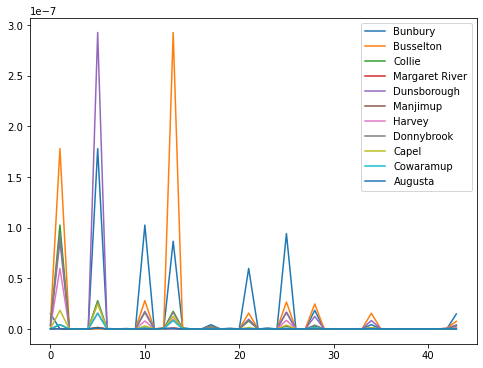

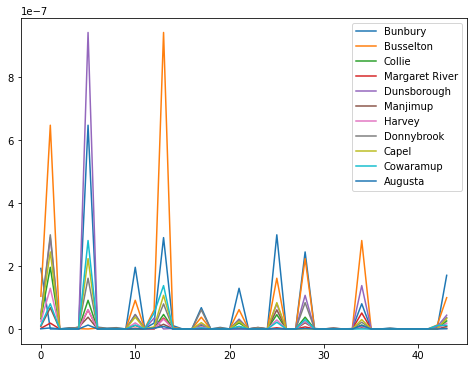

In [38]:
df = d['lvl_1']

plt.figure(figsize = (8,6))
for i in range(len(sw_towns)):
    plt.plot(df.iloc[sw_towns[i]], label = sw.iloc[i][0] )
plt.legend()

df = d['lvl_2']

plt.figure(figsize = (8,6))
for i in range(len(sw_towns)):
    plt.plot(df.iloc[sw_towns[i]], label = sw.iloc[i][0] )
plt.legend()

In [57]:
df = d['lvl_2']
sw_towns = list(sw.index)
for i in range(len(sw_towns)):
    print(sw.iloc[i][0], round(sum(df.iloc[sw_towns[i]])*9*10**9))
    
print('_______________________________________')

df = d['lvl_1']
sw_towns = list(sw.index)
for i in range(len(sw_towns)):
    print(sw.iloc[i][0], round(sum(df.iloc[sw_towns[i]])*9*10**9))

Bunbury 21487
Busselton 24703
Collie 4738
Margaret River 1680
Dunsborough 16111
Manjimup 2311
Harvey 3226
Donnybrook 7973
Capel 7743
Cowaramup 5964
Augusta 376
_______________________________________
Bunbury 5247
Busselton 5418
Collie 1655
Margaret River 33
Dunsborough 4096
Manjimup 106
Harvey 973
Donnybrook 1606
Capel 595
Cowaramup 296
Augusta 21


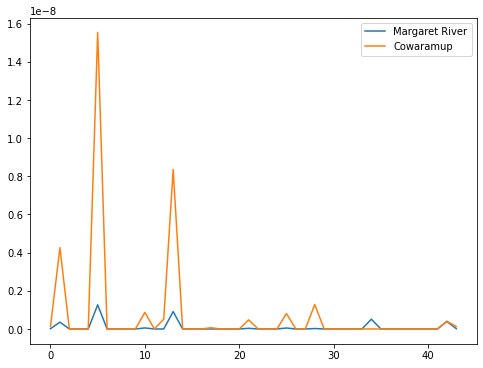

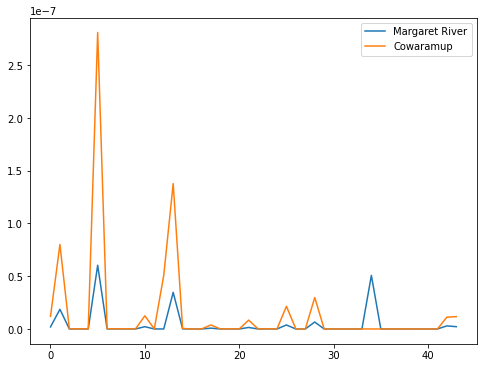

In [47]:
# Two town comparison

sw_towns = [12,34]

df = d['lvl_1']

plt.figure(figsize = (8,6))
for item in sw_towns:
    plt.plot(df.iloc[item], label = waloc.iloc[item][0] )
plt.legend()

df = d['lvl_2']

plt.figure(figsize = (8,6))
for item in sw_towns:
    plt.plot(df.iloc[item], label = waloc.iloc[item][0] )
plt.legend()

In [58]:
st = os.listdir("/Volumes/HardDrive/New_Workflow/44_towns_network")

stoch = []
for i in st:
    if '._' not in i:
        stoch.append(i)
        
d = {}
for i in range(len(stoch)):
    d[str(i)] = pd.read_csv("/Volumes/HardDrive/New_Workflow/44_towns_network/"+stoch[i], header = None, sep =',')

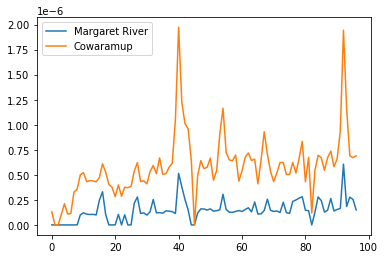

In [70]:

vs = []
for j in [12,34]:
    one = []
    for i in range(len(stoch)):
        df = d[str(i)]
        one.append(sum(df.iloc[j]))
    vs.append(one)

plt.plot(vs[0],label = waloc.iloc[12][0])
plt.plot(vs[1],label = waloc.iloc[34][0])
plt.legend()